## Titanic Survival using Different Classification Methods
General workflow stages:
1. Read and Understand the problem
2. Import libraries
3. Import train and test data
4. Data wranging
5. Analyze and identify the pattern and links between data
6. Bulding a suitable model
7. Data vistualization

#### Problem Description
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

In [445]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline

In [666]:
train_data = pd.read_csv(r"C:\Users\VG\Desktop\Titanic Survival\train.csv")
test_data = pd.read_csv(r"C:\Users\VG\Desktop\Titanic Survival\test.csv")

print(train_data.head())
print(test_data.head())
train_data.info()
test_data.info()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

From the above dataset we understand that, the data set consits of some important features and a few less important features also. So, we may drop those columns and reduce the dimentionality of the dataset. Also, there empty cells in Age and embarked column which will be taken care of later.

We are dropping the passenger Id, Fare, Ticket Number, Embarked and the cabin columns from the dataset as it serves little or no purpose

In [667]:
train_data.drop(['PassengerId','Ticket','Fare','Cabin','Embarked'] , axis = 1)
test_data.drop(['PassengerId','Ticket','Fare','Cabin','Embarked'],axis =1)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the above table, we can notice that there are empty or NaN cells in the age column. So it is necessary to fill it inorder to proceed further

In [668]:

print(train_data.describe())
print(test_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

From the above data.describe() information, we understand that the minimum age of passengers  ranged from 0 to 80. Meaning, there were babies as well as elderly people. And the mean for 891 passengers in train_data is ~30, whereas for test_data, the min is 0 and max is 76 with a mean of ~30.  We can make use of the mean and standard deviation values to fill the empty cells in the age column.

In [669]:
avg_age_train = train_data["Age"].mean()
avg_age_test = test_data["Age"].mean()

std_age_train = train_data["Age"].std()
std_age_test = test_data["Age"].std()

rand_train = np.random.randint(abs(std_age_train-avg_age_train), std_age_train+avg_age_train)
rand_test = np.random.randint(abs(std_age_test-avg_age_test), std_age_test+avg_age_test)

 
train_data['Age'].fillna(rand_train, inplace = True)
test_data['Age'].fillna(rand_test, inplace = True)

print(train_data['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      16.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     16.0
18     31.0
19     16.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     16.0
27     19.0
28     16.0
29     16.0
       ... 
861    21.0
862    48.0
863    16.0
864    24.0
865    42.0
866    27.0
867    31.0
868    16.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    16.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    16.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [670]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

Let's convert non-categorical data into categorial by changing male and female in gender to 0 and 1. Male = 1, Female = 0

In [671]:
train_data.Sex.replace(['male', 'female'], [0, 1], inplace=True)
test_data.Sex.replace(['male', 'female'], [0, 1], inplace=True)
 
train_data.info()
test_data.info()
print(train_data)
print(train_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64

In [672]:
pd.isnull(train_data).sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [673]:
pd.isnull(test_data).sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In the earlier days, class of people was given importance. High class and rich people were given higher priority and low class were given lower priority. Using this information, we could find out the survival rate of passenger. Pclass, Name can be used to find this rate. Pclass has numbers ranging from 1 to 3 meaning 1- high class, 2 - medium, 3 - low class. Similarly, from the names, we can figure out the high class passengers as their names had 'Sir' and 'Lady'.


Splitting title from name

In [674]:
train_data['Title'] = train_data.Name.str.extract('(\w+\.)', expand=False)
test_data['Title'] = test_data.Name.str.extract('(\w+\.)', expand=False)




In [675]:
train_data.drop(['Name', 'Ticket', 'Fare','PassengerId', 'Cabin', 'Embarked'],axis = 1, inplace = True)
test_data.drop(['Name', 'Ticket', 'Fare','PassengerId', 'Cabin', 'Embarked'], axis =1, inplace = True)




Finding relationship between the survival number vs other feathers

1) Age vs survival
2) Title vs survival
3) Pclass vs survival
4) Parch, Sibling vs survival
5) Sex vs survival

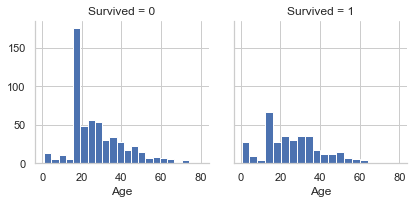

In [676]:

x = sns.FacetGrid(train_data, col='Survived')
x.map(plt.hist, 'Age', bins=20)


Inference : babies and few teens survived more than middle aged

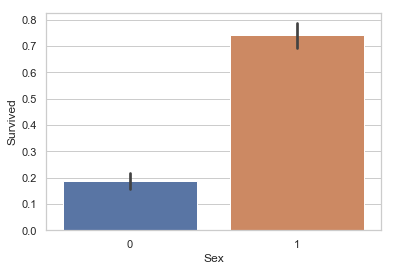

In [677]:
sns.set(style="whitegrid")
>>> tips = sns.load_dataset("tips")
>>> ax = sns.barplot(x=train_data['Sex'], y=train_data['Survived'], data=tips)

Inference: Female survived than men

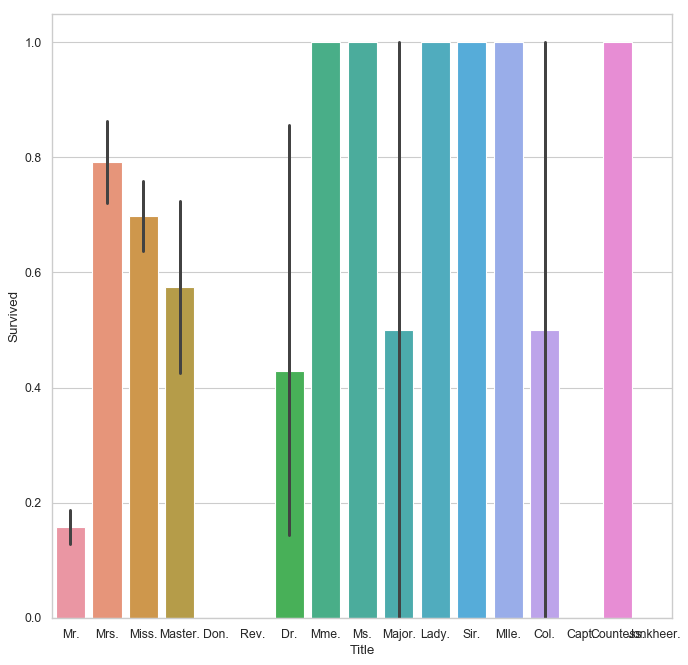

In [678]:
plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

ax = sns.barplot(x=train_data['Title'], y=train_data['Survived'], data=tips)



Inference: High survival rates for high class passengers

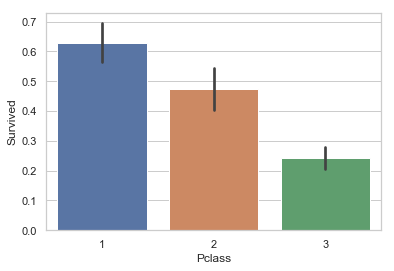

In [679]:
ax = sns.barplot(x=train_data['Pclass'], y=train_data['Survived'], data=tips)

Inference: Again another supporting feature to state high class passengers survived more than low class

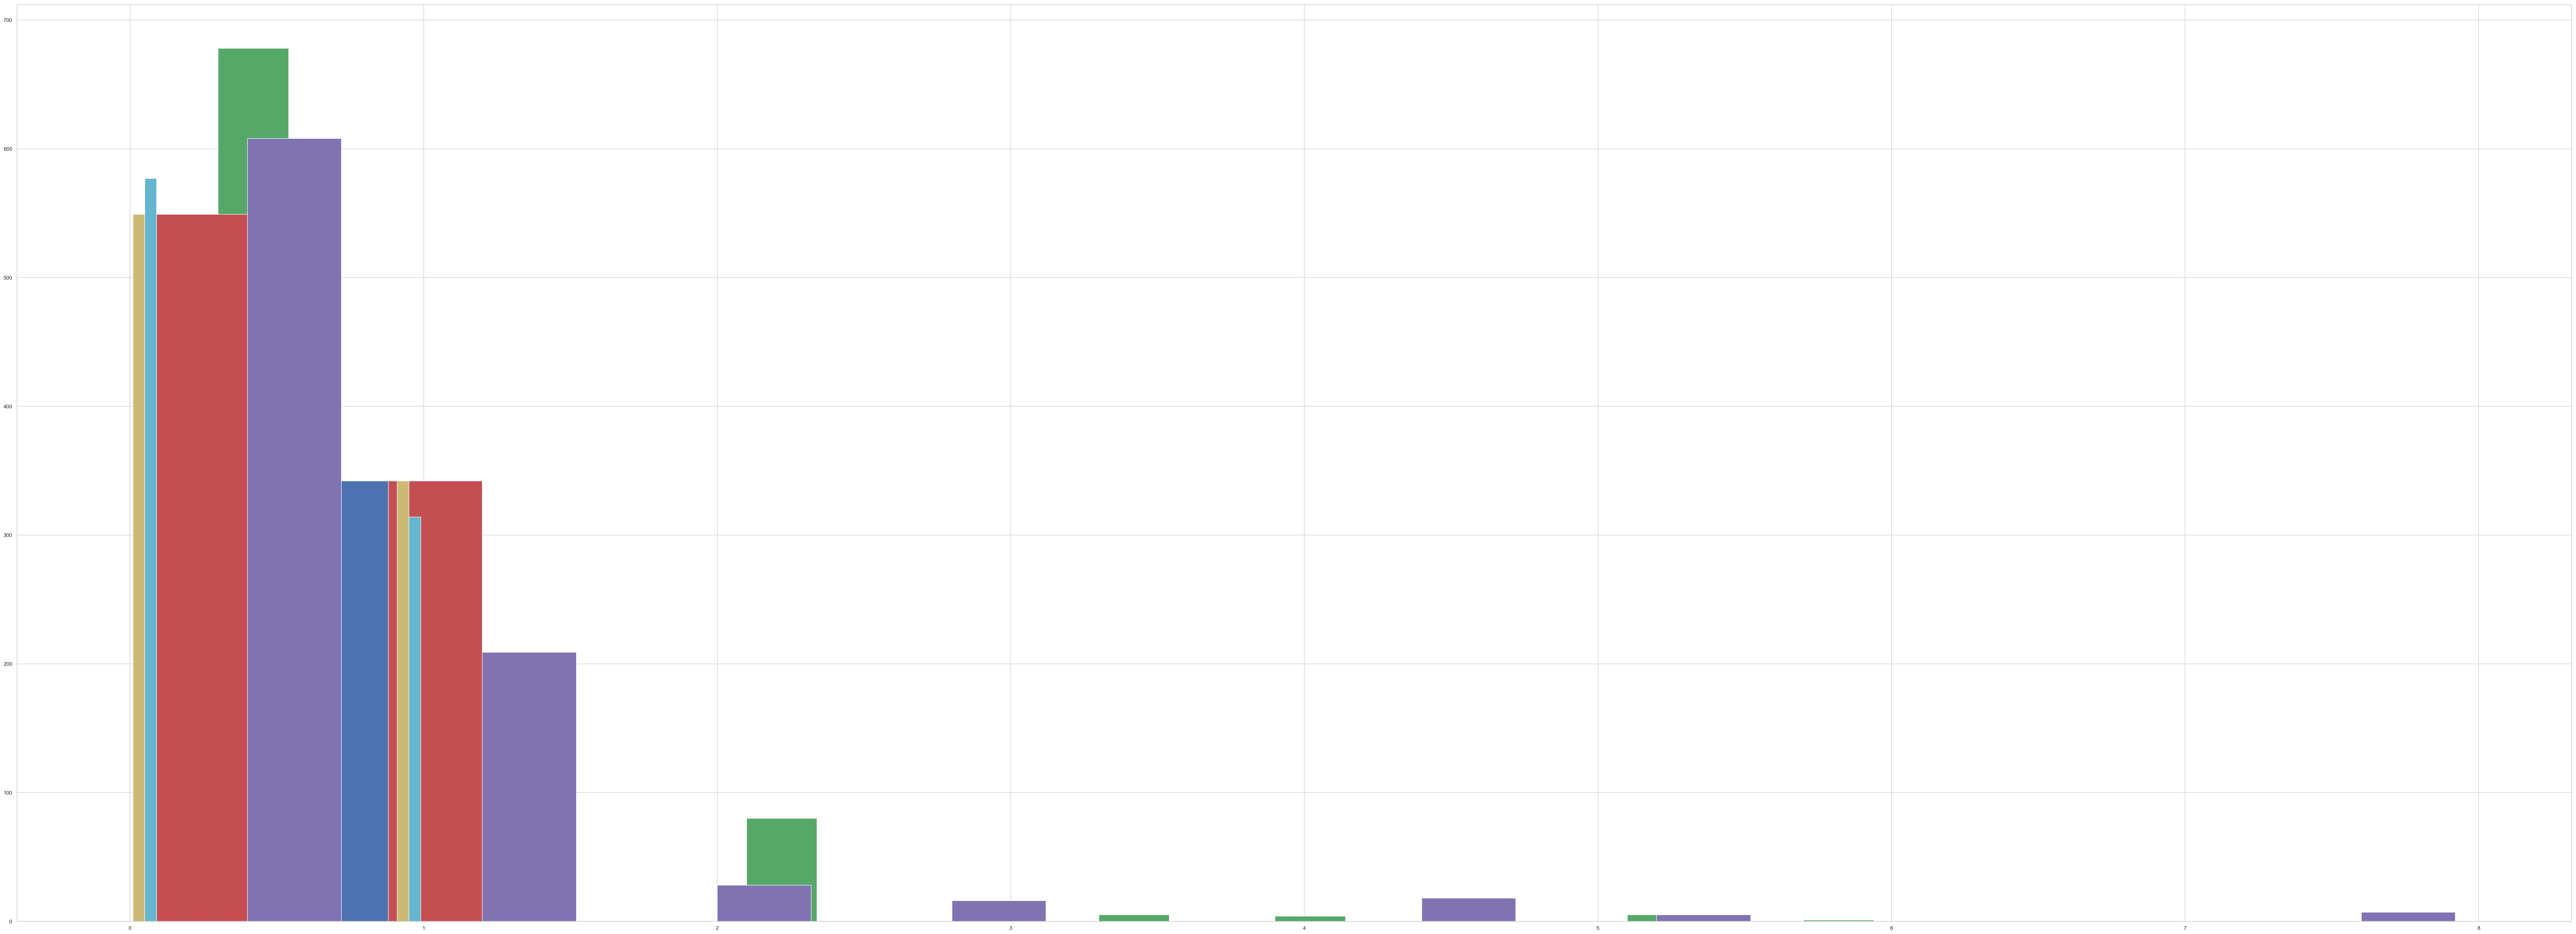

In [680]:
plt.figure(num=None, figsize=(95, 35), dpi=150, facecolor='w', edgecolor='k')

plt.style.use('seaborn-deep')

y= train_data['Parch']
x = train_data['Survived']
y1 = train_data['SibSp']
y2= train_data['Sex']
plt.hist([x,y])
plt.hist([x,y1])
plt.hist([x,y2])
plt.show()


In [681]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Title
0,0,3,0,22.0,1,0,Mr.
1,1,1,1,38.0,1,0,Mrs.
2,1,3,1,26.0,0,0,Miss.
3,1,1,1,35.0,1,0,Mrs.
4,0,3,0,35.0,0,0,Mr.
5,0,3,0,16.0,0,0,Mr.
6,0,1,0,54.0,0,0,Mr.
7,0,3,0,2.0,3,1,Master.
8,1,3,1,27.0,0,2,Mrs.
9,1,2,1,14.0,1,0,Mrs.


In [704]:
from sklearn.metrics import accuracy_score, log_loss
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier


In [682]:
Y_train = train_data['Survived']
Y_train

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [683]:
data = (train_data, test_data)
for dataset in data:
    dataset['Title'] = dataset['Title'].replace(['Lady.', 'Countess.','Capt.', 'Col.', \
 	'Don.', 'Dr.', 'Major.', 'Rev.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Other')

    dataset['Title'] = dataset['Title'].replace(['Mlle.','Miss.','Ms.'], 'Miss')
    
    dataset['Title'] = dataset['Title'].replace(['Mme.','Mrs.'], 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Mr.'], 'Mr')
    dataset['Title'] = dataset['Title'].replace(['Master.'], 'Master')
    
for dataset in data:
    dataset['Title'] = dataset['Title'].replace(['Other'],1)

    dataset['Title'] = dataset['Title'].replace(['Miss'], 2)
    
    dataset['Title'] = dataset['Title'].replace(['Mrs'], 2)
    dataset['Title'] = dataset['Title'].replace(['Mr'], 3)
    dataset['Title'] = dataset['Title'].replace(['Master'], 2)
#print(data)

train_data.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Title
0,0,3,0,22.0,1,0,3
1,1,1,1,38.0,1,0,2
2,1,3,1,26.0,0,0,2
3,1,1,1,35.0,1,0,2
4,0,3,0,35.0,0,0,3


In [690]:
X_train = train_data.drop('Survived', axis=1)




X_test = test_data



X_train


,Pclass,Sex,Age,SibSp,Parch,Title
0,3,0,22.0,1,0,3
1,1,1,38.0,1,0,2
2,3,1,26.0,0,0,2
3,1,1,35.0,1,0,2
4,3,0,35.0,0,0,3
5,3,0,16.0,0,0,3
6,1,0,54.0,0,0,3
7,3,0,2.0,3,1,2
8,3,1,27.0,0,2,2
9,2,1,14.0,1,0,2


In [691]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Title
0,3,0,34.5,0,0,3
1,3,1,47.0,1,0,2
2,2,0,62.0,0,0,3
3,3,0,27.0,0,0,3
4,3,1,22.0,1,1,2


In [692]:
X_train.shape, Y_train.shape, X_test.shape


((891, 6), (891,), (418, 6))

In [722]:
logreg = LogisticRegression()

logreg.fit(X_train,Y_train )

Y_pred = logreg.predict(X_test)

acc_log = logreg.score(Y_pred, Y_train)

print(acc_log)

0.7912457912457912


C:\Users\VG\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [723]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

acc_svc = svc.score(Y_pred, Y_train)

print(acc_svc)

0.856341189674523


C:\Users\VG\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [730]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc.fit(X_train, Y_train)
Y_pred = lsvc.predict(X_test)
acc_lsvc = lsvc.score(Y_pred, Y_train)
acc_lsvc


C:\Users\VG\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8103254769921436

In [724]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = sgd.score(Y_pred, Y_train)
acc_sgd


C:\Users\VG\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.7306397306397306

In [725]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_xgb = sgd.score(Y_pred, Y_train)
acc_xgb

0.7306397306397306

In [735]:
from sklearn.ensemble import RandomForestClassifier

r_forest = RandomForestClassifier(n_estimators=100)
r_forest.fit(X_train, Y_train)
Y_pred = r_forest.predict(X_test)
acc_random_forest = r_forest.score(Y_pred, Y_train) 
acc_random_forest

0.9225589225589226

In [739]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, Y_train)
Y_pred =dec_tree.predict(X_test)
acc_dec_tree =dec_tree.score(Y_pred, Y_train) 
acc_dec_tree

0.9225589225589226

In [747]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred =knn.predict(X_test)
acc_knn =knn.score(Y_pred, Y_train) 
acc_knn

0.8518518518518519

In [749]:
models = pd.DataFrame({'Model': ['Logistic Regression', 'Support Vector Machines', 
              
              'XGBoost', 'Stochastic Gradient Decent', 'SVC', 'Linear SVC', 'Decision Tree', 'Random Forest', 'KNN'],
    
    'Score': [acc_log, acc_svc, acc_sgd, acc_xgb, acc_svc, acc_lsvc, acc_knn, acc_dec_tree, acc_random_forest] })
              
models.sort_values(by='Score', ascending=False)


,Model,Score
7,Random Forest,0.922559
8,KNN,0.922559
1,Support Vector Machines,0.856341
4,SVC,0.856341
6,Decision Tree,0.851852
5,Linear SVC,0.810325
0,Logistic Regression,0.791246
2,XGBoost,0.730640
3,Stochastic Gradient Decent,0.730640
